In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
# Read the CSV file using pandas
df = pd.read_csv("star_classification.csv")

# Pre-processing

In [3]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [4]:
df.dtypes

# Columns are mostly numeric, we will encode "class" column

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [5]:
df.info()

# There is no missing value as seen, so no need to fill null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1)

In [7]:
df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [8]:
# Encoding categorical data ('class')
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [9]:
df.head(10)

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,3,1,1.424659,5026,55855
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,2,1,0.586455,11069,58456
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,2,0,0.477009,6183,56210
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,5,0,0.660012,6625,56386
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,4,2,-0.000008,2444,54082


In [10]:
# applying scaling, values will be scaled between 0-1
min_max_scaler = MinMaxScaler()

cols_to_scale = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'plate', 'MJD']

df[cols_to_scale] = min_max_scaler.fit_transform(df[cols_to_scale])

In [11]:
correlation_matrix = df.corr()

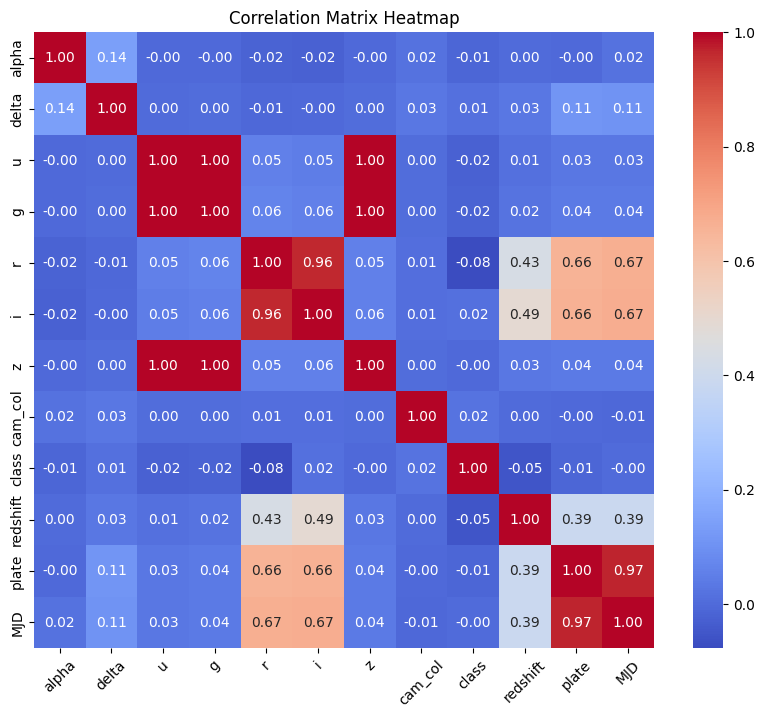

In [12]:
plt.figure(figsize=(10, 8))

# Create the heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

# Split the Dataset

### Option.1 : Train-Test Split

In [13]:
X = df.drop(columns=["class"])  # exclude the target variable 'class'
y = df["class"] # target variable 'class'

# split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Option.2 : k-Fold Cross Validation (5-folds)

In [14]:
# Create a 5-fold cross-validation splitter
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# models will be evaluated with code below
# scores = cross_val_score(model, X, y, cv=kf)

In [15]:
def calculate_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  return accuracy, precision, recall, f1

In [16]:
def calculate_mean_metrics(accuracies, precisions, recalls, f1s):
  mean_accuracy = sum(accuracies) / len(accuracies)
  mean_precision = sum(precisions) / len(precisions)
  mean_recall = sum(recalls) / len(recalls)
  mean_f1 = sum(f1s) / len(f1s)

  return mean_accuracy, mean_precision, mean_recall, mean_f1

# Classification Methods

## 1. with Train-Test Split

In [17]:
# kNN
#create the knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on the test set
y_pred_knn = knn.predict(X_test)

accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_metrics(y_test, y_pred_knn)

In [18]:
# Weighted k-Nearest Neighbors (kNN)
# create the weighted kNN model
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn.fit(X_train, y_train)

# predict on the test set
y_pred_weighted_knn = weighted_knn.predict(X_test)

accuracy_weighted_knn, precision_weighted_knn, recall_weighted_knn, f1_weighted_knn = calculate_metrics(y_test, y_pred_weighted_knn)

In [19]:
# Naive Bayes
# create the naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# predict on the test set
y_pred_nb = nb.predict(X_test)

accuracy_nb, precision_nb, recall_nb, f1_nb = calculate_metrics(y_test, y_pred_nb)

In [20]:
# Random Forest
# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate Random Forest metrics
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_metrics(y_test, y_pred_rf)

In [21]:
# Support Vector Machines (SVM)
# Create the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Calculate SVM metrics
accuracy_svm, precision_svm, recall_svm, f1_svm = calculate_metrics(y_test, y_pred_svm)

In [22]:
print("Classification Results with Train-Test Split")
print("\t \t kNN \t \t Weighted kNN \t Naive Bayes \t Random Forest \t SVM")
print(f"Accuracy: \t {accuracy_knn:.4f} \t {accuracy_weighted_knn:.4f} \t {accuracy_nb:.4f} \t {accuracy_rf:.4f} \t {accuracy_svm:.4f}")
print(f"Precision: \t {precision_knn:.4f} \t {precision_weighted_knn:.4f} \t {precision_nb:.4f} \t {precision_rf:.4f} \t {precision_svm:.4f}")
print(f"Recall: \t {recall_knn:.4f} \t {recall_weighted_knn:.4f} \t {recall_nb:.4f} \t {recall_rf:.4f} \t {recall_svm:.4f}")
print(f"F1-Score: \t {f1_knn:.4f} \t {f1_weighted_knn:.4f} \t {f1_nb:.4f} \t {f1_rf:.4f} \t {f1_svm:.4f}")


Classification Results with Train-Test Split
	 	 kNN 	 	 Weighted kNN 	 Naive Bayes 	 Random Forest 	 SVM
Accuracy: 	 0.9092 	 0.9149 	 0.7201 	 0.9772 	 0.9417
Precision: 	 0.9110 	 0.9162 	 0.7745 	 0.9771 	 0.9423
Recall: 	 0.9092 	 0.9149 	 0.7201 	 0.9772 	 0.9417
F1-Score: 	 0.9083 	 0.9142 	 0.6734 	 0.9771 	 0.9413


## 2. 5-fold Cross-validation

In [23]:
# Create and train kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# lists for knn
accuracies_knn = []
precisions_knn = []
recalls_knn = []
f1_scores_knn = []

# perform cross validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_knn)

    accuracies_knn.append(accuracy_fold)
    precisions_knn.append(precision_fold)
    recalls_knn.append(recall_fold)
    f1_scores_knn.append(f1_fold)

mean_acc_knn, mean_prec_knn, mean_rec_knn, mean_f1_knn = calculate_mean_metrics(accuracies_knn, precisions_knn, recalls_knn, f1_scores_knn)


In [24]:
# Create and train weighted kNN model
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# lists for weighted kNN
accuracies_weighted_knn = []
precisions_weighted_knn = []
recalls_weighted_knn = []
f1_scores_weighted_knn = []

# perform cross-validation for weighted kNN
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    weighted_knn.fit(X_train, y_train)
    y_pred_weighted_knn = weighted_knn.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_weighted_knn)

    accuracies_weighted_knn.append(accuracy_fold)
    precisions_weighted_knn.append(precision_fold)
    recalls_weighted_knn.append(recall_fold)
    f1_scores_weighted_knn.append(f1_fold)

mean_acc_weighted_knn, mean_prec_weighted_knn, mean_rec_weighted_knn, mean_f1_weighted_knn = calculate_mean_metrics(accuracies_weighted_knn, precisions_weighted_knn, recalls_weighted_knn, f1_scores_weighted_knn)


In [25]:
# Create and train Naive Bayes model
nb = GaussianNB()

# lists for nb
accuracies_nb = []
precisions_nb = []
recalls_nb = []
f1_scores_nb = []

# perform cross validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_knn)

    accuracies_nb.append(accuracy_fold)
    precisions_nb.append(precision_fold)
    recalls_nb.append(recall_fold)
    f1_scores_nb.append(f1_fold)

mean_acc_nb, mean_prec_nb, mean_rec_nb, mean_f1_nb = calculate_mean_metrics(accuracies_nb, precisions_nb, recalls_nb, f1_scores_nb)


In [26]:
# Create the Random Forest model

rf = RandomForestClassifier(n_estimators=100, random_state=42)

accuracies_rf = []
precisions_rf = []
recalls_rf = []
f1_scores_rf = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_rf)

    accuracies_rf.append(accuracy_fold)
    precisions_rf.append(precision_fold)
    recalls_rf.append(recall_fold)
    f1_scores_rf.append(f1_fold)

mean_acc_rf, mean_prec_rf, mean_rec_rf, mean_f1_rf = calculate_mean_metrics(accuracies_rf, precisions_rf, recalls_rf, f1_scores_rf)


In [27]:
# Support Vector Machines (SVM) within 5-fold cross-validation

accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm = SVC(kernel='linear', C=1.0, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_svm)

    accuracies_svm.append(accuracy_fold)
    precisions_svm.append(precision_fold)
    recalls_svm.append(recall_fold)
    f1_scores_svm.append(f1_fold)

mean_acc_svm, mean_prec_svm, mean_rec_svm, mean_f1_svm = calculate_mean_metrics(accuracies_svm, precisions_svm, recalls_svm, f1_scores_svm)


In [28]:
print("Classification Results with 5-fold Cross-Validation")
print("\t \t kNN \t \t Weighted kNN \t Naive Bayes \t Random Forest \t SVM")
print(f"Accuracy: \t {mean_acc_knn:.4f} \t {mean_acc_weighted_knn:.4f} \t {mean_acc_nb:.4f} \t {mean_acc_rf:.4f} \t {mean_acc_svm:.4f}")
print(f"Precision: \t {mean_prec_knn:.4f} \t {mean_prec_weighted_knn:.4f} \t {mean_prec_nb:.4f} \t {mean_prec_rf:.4f} \t {mean_prec_svm:.4f}")
print(f"Recall: \t {mean_rec_knn:.4f} \t {mean_rec_weighted_knn:.4f} \t {mean_rec_nb:.4f} \t {mean_rec_rf:.4f} \t {mean_rec_svm:.4f}")
print(f"F1-Score: \t {mean_f1_knn:.4f} \t {mean_f1_weighted_knn:.4f} \t {mean_f1_nb:.4f} \t {mean_f1_rf:.4f} \t {mean_f1_svm:.4f}")

Classification Results with 5-fold Cross-Validation
	 	 kNN 	 	 Weighted kNN 	 Naive Bayes 	 Random Forest 	 SVM
Accuracy: 	 0.9115 	 0.9167 	 0.9115 	 0.9777 	 0.9405
Precision: 	 0.9132 	 0.9180 	 0.9132 	 0.9776 	 0.9412
Recall: 	 0.9115 	 0.9167 	 0.9115 	 0.9777 	 0.9405
F1-Score: 	 0.9106 	 0.9159 	 0.9106 	 0.9775 	 0.9401


# Explanations and Plots

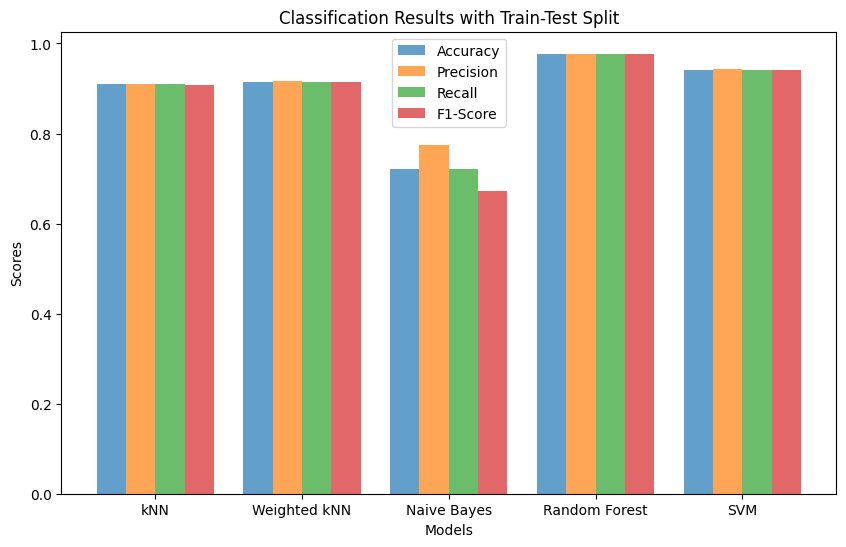

In [29]:
# Scores of train-test split
models = ['kNN', 'Weighted kNN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy = [accuracy_knn, accuracy_weighted_knn, accuracy_nb, accuracy_rf, accuracy_svm]
precision = [precision_knn, precision_weighted_knn, precision_nb, precision_rf, precision_svm]
recall = [recall_knn, recall_weighted_knn, recall_nb, recall_rf, recall_svm]
f1_score = [f1_knn, f1_weighted_knn, f1_nb, f1_rf, f1_svm]

bar_width = 0.2
x = range(len(models))
plt.figure(figsize=(10, 6))

plt.bar(x, accuracy, width=bar_width, label='Accuracy', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision', align='center', alpha=0.7)
plt.bar([i + 2*bar_width for i in x], recall, width=bar_width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 3*bar_width for i in x], f1_score, width=bar_width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Classification Results with Train-Test Split')
plt.xticks([i + 1.5 * bar_width for i in x], models)
plt.legend()
plt.show()


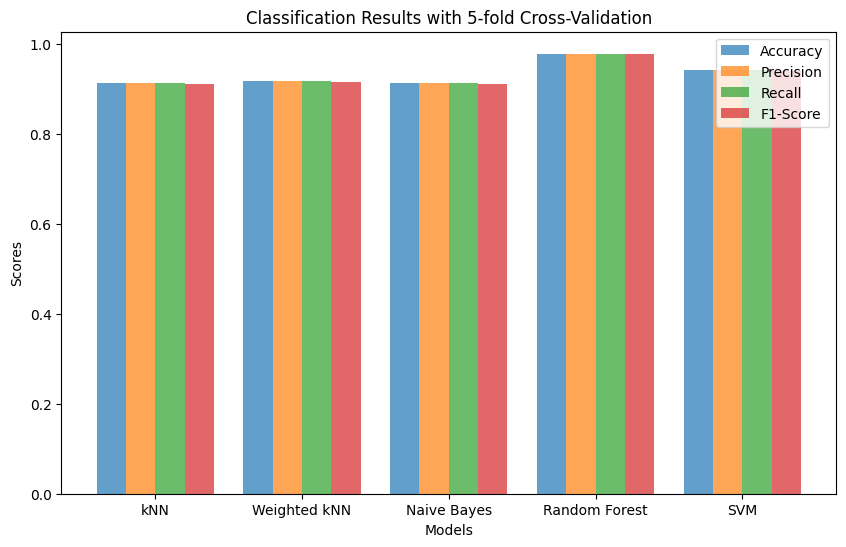

In [30]:
# Scores of 5-fold cross validation
models = ['kNN', 'Weighted kNN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy = [mean_acc_knn, mean_acc_weighted_knn, mean_acc_nb, mean_acc_rf, mean_acc_svm]
precision = [mean_prec_knn, mean_prec_weighted_knn, mean_prec_nb, mean_prec_rf, mean_prec_svm]
recall = [mean_rec_knn, mean_rec_weighted_knn, mean_rec_nb, mean_rec_rf, mean_rec_svm]
f1_score = [mean_f1_knn, mean_f1_weighted_knn, mean_f1_nb, mean_f1_rf, mean_f1_svm]

bar_width = 0.2
x = range(len(models))
plt.figure(figsize=(10, 6))

plt.bar(x, accuracy, width=bar_width, label='Accuracy', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision', align='center', alpha=0.7)
plt.bar([i + 2*bar_width for i in x], recall, width=bar_width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 3*bar_width for i in x], f1_score, width=bar_width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Classification Results with 5-fold Cross-Validation')
plt.xticks([i + 1.5 * bar_width for i in x], models)
plt.legend()
plt.show()


In the 5-fold Cross-Validation results, we can see that Random Forest achieved the highest Accuracy, Precision, Recall, and F1-Score. On the other hand, Naive Bayes, kNN and weighted-kNN performed consistently but slightly lower in terms of metrics. SVM also performed well, but not as high as Random Forest.

In the Train-Test Split results, Random Forest still performs exceptionally well with high Accuracy, Precision, Recall, and F1-Score. SVM also remains competitive. kNN and weighted-kNN performed consistently. However, the performance of Naive Bayes dropped noticeably.

### 5-fold Cross-Validation:

Random Forest is the top performer in the 5-fold Cross-Validation due to its ability to handle complex data relationships. Weighted kNN, an extended version of kNN, also performs well. Naive Bayes and kNN, relying on probabilistic concepts, outperform each other but have slightly lower performance. SVM, seeking the optimal hyperplane for class separation, remains a competitive choice for the dataset.

### Train - Test Split

In the Train-Test Split scenario, Random Forest and kNN consistently performs well, even with variations in data distribution. Weighted kNN, an enhanced version of kNN, also performs well, suggesting that assigning different weights to nearest neighbors can improve model performance. Naive Bayes is competitive but sensitive to data distribution shifts, causing inconsistent performance across evaluation metrics. SVM is a reliable choice, consistently delivering competitive results by identifying an optimal hyperplane for class separation.